In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

##Random Methods

#### 1) Psuedo random number generator.

Write a random number generator that gives random integer from 1 to 5. Make sure the cycle length is greater than 30.

In [4]:
def randomGen():
    a = 12345
    b = 23454545
    x = 234
    for i in range(100):
        x = (a*x+b)%(2**32)    
        print(x%5+1)
# randomGen()

#### 2)  Monte Carlo Integral.

Evaluate the following integral

$$\iiint \limits_C e^{-2x^2y^3z^4} \; dx \; dy \; dz $$

where $C$ is a sphere of radius 2 centered at (1,2,3).

In [5]:
n = 100000
x = np.random.random(n)*4-1        #[-1,3]
y = np.random.random(n)*4          #[0,4]
z = np.random.random(n)*4+1        #[1,5]
def f(x,y,z):
    return math.exp(-2*x**2*y**3*z**4)

ans = sum([f(x,y,z)*64./n for x,y,z in zip(x,y,z) if ((x-1)**2+(y-2)**2+(z-3)**2<=4)])       #cube 4*4*4
print (ans) 

1.3124054022141063


#### 3) Coffee Shop (You can pick one to do either problem 3 or problem 4)

Let us consider the fruit shop in MUIC canteen. On each day the shop owner needs to figure out how many mangoes to buy on each day.

MUIC has about 4000 students: 2200 female and 1800 male.
The probability that a female student will buy mangoes on a day is about 5% and for male student is 3%.

Each mango costs the shop 8 Baht a piece. The shop sell it for 20 Baht making 12 Baht profit. To make the problem simple we will assume two things.

 1. Mango last only one day which means any left over mango worth 0 Baht at the end of the day.
 2. To make the problem simple let us ignore the fixed cost such as rent and labor.
 3. The shop owner cannot refill mango during the day. If the shop ran out of mango, and next customer comes in. The shop can't make the sale.
 
The shopowner wants to maximize the profit. If the shop owner take the risk by buying a lot he will not be short of mango on a good day, but on a bad day he/she will lose a lot. The shop owner can play safe by buying very few mango so he/she don't lose too much on a bad day, but he/she will miss out a lot of money on a good day.

Your task is to figure out how many mangoes the shop owner should buy.

Hint: Use simulation and make a useful plot.

In [25]:
def buy(prop):                #prop 0.03 male 0.05 female  
    x = np.random.rand()
    if x < prop:
        return 1 
    return 0 
    
def sim_oneDay():
    male = 1800
    female = 2200
    sold = 0
    while(male+female > 0): 
        customer = np.random.randint(2)
        if customer == 1:       #male      
            sold += buy(0.03)
            male-=1
        else:
            sold += buy(0.05)
            female-=1
    return sold 

mangos = [sim_oneDay() for i in range(100)]
print(sum(mangos)/100)

159.69


#### 4) Blackjack

Let us consider a simplified game of Blackjack. The game is a two-player game: dealer vs player. The goal of the game is get the sum of the card closest to but not over 21.

The cards are counted as follows

1. 2,3,4,5,6,7,8,9 are counted for the number on the card
2. J,Q,K are counted as 10
3. A are counted as either 1 or 11. Whichever one that gets us closer but not over 21.

Here are some example

1. 2, J has the sum of 2+10=12
2. J Q has the sum of 10+10 = 10
3. J A has the sum of 10+11 = 21
4. A 2 J has the sum of 1 + 2 + 10 = 13 (Ace here counts as one since 11 will make the sum over 21)

Here is how the game works:

1. At the beginning each player gets two cards.
2. If one player got 21 with that two cards, that player wins. If both players got 21 with the two cards then it's a draw.
3. The player start first. The player can choose to stop or draw more cards for a chance to improve his/her hand. For this problem we will only consider the algorithm that if the player hand is strictly less than 17 he will draw. If the player has 17 or more, he/will keep drawing until the hand he/she has is 17 or more.
4. If after any draw, the player has more than 21. This is called busted. Once the player is busted the player lose the game immediately.
5. If the player stop drawing, and the dealer will start drawing with the same algorithm explained in 3. That is if the dealer has the sum of less than 17 the dealer will keep drawing until his hand is more than 17.
6. If the dealer is busted, the dealer lose.(Note that if the player is busted, the dealer wins immediately regardless of the result from dealer's draw)
7. If the dealer is not busted, then the sum of player hands and dealer hand are compared. Whoever got the higher number wins.

**Your task**: Suppose we are playing this game with infinite amount of card deck. This means that the next card we draw is independent of the cards that are already out. *Calculate the probability that the player wins*.

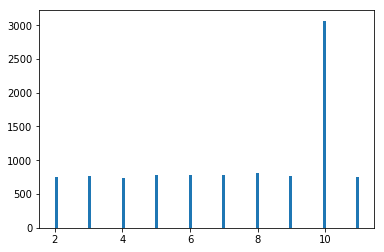

In [7]:
#simulation 
def draw():
    card = [2,3,4,5,6,7,8,9,10,10,10,10,11]
    c = np.random.randint(13)
    return card[c]

x = [draw() for i in range(10000)] 
plt.hist(x, bins=100);

In [8]:
def blackJack():
    pl = sum([draw(), draw()])
    dl = sum([draw(), draw()])
    if pl == 21:
        if dl == 21:
            return 0
        return 1 
    else:
        while(pl < 17):
            d = draw()
            pl+=d
            if d==11 & pl > 21: 
                pl-=10          
        if pl > 21: 
            return 0 #busted 
        
        while(dl < 17):
            d = draw()
            dl+=d 
            if d==11 & dl > 21:
                dl -= 10
        if dl > 21:
            return 1         
        if pl > dl: 
            return 1
    return 0

win=0 
for i in range(100000):
    win += blackJack()
print(win/100000.)

0.40453


#### 5) Travelling Salesman Problem.

This problem concerns solving a famouse NP problem called Traveling salesman problem. Here is the prolem:

Consider a salesman who wants to travel to every city with minimum total cost and go back to the original city. Going from one city to another city has cost associtated with it.

Suppose there are 4 cities $\{c_1, c_2, c_3, c_4\}$ and the ticket price from going from city $i$ to city $j$ is $T_{ij}$. The tour of the four cities can be represented as a permutation. For example, the strategy that visit the four cities and going back to the original in the following order


$$c_2 \to c_3 \to c_1 \to c_4 \to c_2$$


can be represented with the list


$$L = [2, 3, 1, 4]$$


and the cost associated with this trip is given by the sum of the travel cost of one to the next and from the end to the beginning


$$ \text{Cost}(L) = T_{23} + T_{31} + T_{14} + T_{42}$$

This is an NP problem since we need to search over the space of $N!$ trips where $N$ is the number of cities. If we try to do a brute force search it will take way too long.

**Your Task** Solve this problem using hill climbing/ simulated annealing for the 10 cities where the cost for going from city $i$ to city $j$ is given in the matrix T$ $below.

**Hint**: The move you can make to get the next tour from previous tour is to pick two numbers from the old tour and swap them.

See wiki for more info regarding this problem.

In [127]:
np.random.seed(79)
n_city = 10
T = (np.random.randn(n_city, n_city)+1)**2
print (T)

[[  5.36551819e+00   1.14359131e+00   3.62920324e-02   1.00531801e+00
    2.09386158e-01   3.89074153e+00   2.62736812e+00   2.40298591e+00
    3.44164131e+00   2.44568684e+00]
 [  9.52936482e-01   6.05261424e+00   2.85784864e+00   1.44510566e+01
    1.56741697e-02   1.62122064e-01   6.19318312e-02   2.25966338e-02
    3.49750434e-01   9.93346259e-02]
 [  5.57008430e-01   1.02204732e+00   2.79947004e+00   3.14812188e+00
    1.13888016e+00   2.13477278e-02   4.00448219e-02   4.32240531e+00
    8.88523687e-04   2.59439790e+00]
 [  6.43633398e-01   4.54214569e+00   1.49370006e-01   3.40206057e+00
    8.16949414e-04   6.51237637e+00   2.03806148e-01   2.74630722e-01
    3.17146814e+00   7.97775945e-01]
 [  1.24894119e-01   4.23053518e+00   2.73329253e-02   7.19363057e+00
    2.27655107e+00   3.66615197e-01   2.71824111e+00   3.35428656e+00
    1.35610634e+00   3.94427165e+00]
 [  2.54997857e-01   1.38007051e+00   2.49528041e+00   2.62291057e+00
    9.33013676e-01   2.55151767e+00   3.68474

In [2]:
def cost(L):
    c = 0
    for i in range(len(L)-1):
        c += T[L[i],L[i+1]]
    c+=T[L[-1],L[0]]
    return c

def changeState(curr_state):
    new_state = curr_state.copy()
    i, j = np.random.choice(10, 2,replace= False)
    idx_i = new_state[i]
    idx_j = new_state[j]
    new_state[i] = idx_j
    new_state[j] = idx_i
    return new_state
    
def find_path():
    curr_state = np.random.choice(10, 10,replace= False)
    curr_cost = cost(curr_state)
    for i in range (200000):
        new_state = changeState(curr_state)
        new_cost = cost(new_state)
        if(new_cost < curr_cost):
            curr_cost = new_cost
            curr_state = new_state
    return curr_state, curr_cost

print(find_path())

NameError: name 'np' is not defined

In [140]:
# print (cost([1,2,4]))
# print (T[1,2]+T[2,4]+T[4,1])

8.22726397913
8.22726397913


In [1]:
i, j = np.random.choice(50, 2,replace= False)
print(i,j)

NameError: name 'np' is not defined